# Notebook for data preparation and visualization

In [303]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import decomposition
warnings.simplefilter('ignore')
#line to print the plots here
%matplotlib inline
#Render images
%config inlineBackend.figure_format = 'svg'

### Clinical Data

In [140]:
clinical= pd.read_csv('20160128-GBM-Clinical.txt', sep="\t",header=0,index_col=0)
clinical=clinical.transpose()
clinical=clinical.drop(columns=["Composite Element REF"])
clinical["years_to_birth"] = clinical["years_to_birth"].apply(pd.to_numeric)
clinical["days_to_death"] = clinical["days_to_death"].apply(pd.to_numeric)
clinical["date_of_initial_pathologic_diagnosis"] = clinical["date_of_initial_pathologic_diagnosis"].apply(pd.to_numeric)
clinical["karnofsky_performance_score"] = clinical["karnofsky_performance_score"].apply(pd.to_numeric)
clinical["vital_status"] = clinical["vital_status"].apply(pd.to_numeric)

In [141]:
clinical.head()

Hybridization REF,years_to_birth,vital_status,days_to_death,days_to_last_followup,tumor_tissue_site,gender,date_of_initial_pathologic_diagnosis,radiation_therapy,karnofsky_performance_score,histological_type,race,ethnicity
tcga-06-6391,44,1,45.0,NaN,brain,female,2011,no,NaN,untreated primary (de novo) gbm,white,not hispanic or latino
tcga-19-a6j4,68,1,121.0,NaN,brain,male,2013,NaN,NaN,glioblastoma multiforme (gbm),black or african american,not hispanic or latino
tcga-06-1806,47,1,466.0,NaN,brain,male,2009,yes,90.0,glioblastoma multiforme (gbm),white,not hispanic or latino
tcga-06-5408,54,1,357.0,NaN,brain,female,2009,yes,80.0,untreated primary (de novo) gbm,white,not hispanic or latino
tcga-06-5410,72,1,108.0,NaN,brain,female,2010,no,60.0,untreated primary (de novo) gbm,white,not hispanic or latino


In [130]:
clinical.describe()

Hybridization REF,years_to_birth,vital_status,days_to_death,date_of_initial_pathologic_diagnosis,karnofsky_performance_score
count,595.000000,595.000000,490.000000,595.000000,442.000000
mean,57.816807,0.825210,504.500000,2004.815126,77.036199
std,14.416311,0.380107,538.727567,5.042524,15.621473
min,10.000000,0.000000,3.000000,1989.000000,0.000000
25%,50.000000,1.000000,170.500000,2002.000000,70.000000
50%,59.000000,1.000000,382.000000,2006.000000,80.000000
75%,68.000000,1.000000,609.250000,2009.000000,80.000000
max,89.000000,1.000000,3881.000000,2013.000000,100.000000


In [144]:
clinical["days_to_death"].isna().sum()

105

In [ ]:
# Should we consider NaN in days_to_death as patients that survived?? or should we consider vital_status instead?
#The longest time is 3881 days, and 105 patients have NaN in this column

#### Time to death

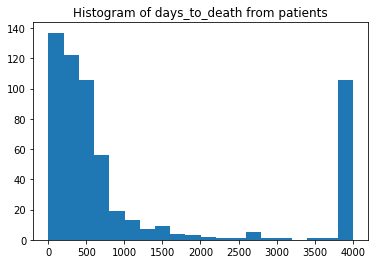

In [93]:
time_to_death=clinical["days_to_death"].fillna(value=4000)
time_to_death=time_to_death.apply(int)
plt.hist(time_to_death, bins="auto")  # arguments are passed to np.histogram
plt.title("Histogram of days_to_death from patients")
plt.show()

#### Vital status

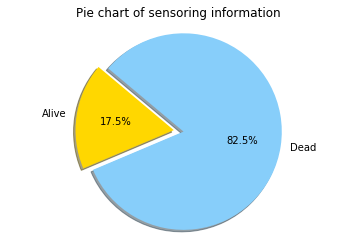

In [148]:
vital_status=clinical["vital_status"].apply(int)
ones=vital_status.sum()
zeroes=len(vital_status)-ones
# Data to plot
labels = 'Alive', 'Dead'
sizes = [zeroes,ones]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie chart of sensoring information")
plt.axis('equal')
plt.show()

## RNA Microarray data

In [187]:
mRNAArray= pd.read_csv('20160128-GBM-mRNAArray-3.txt', sep="\t",header=0,index_col=0)
mRNAArray=mRNAArray.drop("Composite Element REF")
mRNAArray=mRNAArray.apply(pd.to_numeric)
mRNAArray=mRNAArray.transpose()
mRNAArray.head()

Hybridization REF,AACS,FSTL1,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,SAMD4A,SMARCD3,A4GNT,...,KIAA0802,DHRS2,RAB8A,SGEF,PIK3IP1,RPS27,SNRPD2,SLC39A6,CTSC,AQP7
TCGA-02-0001-01C-01R-0177-01,6.500551,8.729663,5.511362,4.882953,10.984784,7.535193,8.674010,5.032552,4.710970,5.108478,...,7.031196,7.153611,9.048851,4.366050,6.054001,12.911917,11.872288,6.867686,10.354085,4.709882
TCGA-02-0003-01A-01R-0177-01,6.539245,9.794400,6.213981,4.836276,10.811245,6.997933,9.348590,5.026961,5.327734,4.348606,...,6.305493,4.006913,8.864498,4.385314,6.674161,13.419446,11.109714,8.147826,11.367438,4.196368
TCGA-02-0004-01A-01R-0298-01,7.377848,12.059550,7.051738,6.112444,10.436374,9.132060,11.248461,5.559116,8.268237,4.052377,...,5.948139,4.025056,8.845742,4.814875,6.464478,13.229641,11.320978,8.519248,10.379502,3.733875
TCGA-02-0007-01A-01R-0177-01,7.186891,4.945053,5.230444,5.818606,10.477304,8.356117,4.429521,5.175938,4.440470,4.824183,...,6.502366,4.290511,8.483590,4.798488,5.060176,13.575052,11.665592,9.189867,11.478158,4.323108
TCGA-02-0009-01A-01R-0177-01,7.675038,10.840095,6.620676,5.333213,10.637267,6.942901,9.452231,5.164914,4.952207,4.204604,...,5.142545,5.410476,9.239238,4.343192,6.478035,13.286953,11.480397,8.556436,10.404706,4.639090


In [188]:
mRNA_description=mRNAArray.describe()
mRNA_description.head(8)

Hybridization REF,AACS,FSTL1,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,SAMD4A,SMARCD3,A4GNT,...,KIAA0802,DHRS2,RAB8A,SGEF,PIK3IP1,RPS27,SNRPD2,SLC39A6,CTSC,AQP7
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,...,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,6.857476,9.698384,7.033371,4.798021,10.717471,9.540024,7.712223,5.563474,8.322169,4.381581,...,6.626050,4.238019,8.659857,5.479921,6.061114,13.092543,11.220665,8.878248,9.053156,3.858680
std,0.580120,1.057241,0.685507,0.498979,0.393487,0.821276,1.175252,0.379776,1.036997,0.197806,...,0.815168,0.566826,0.636302,0.883631,0.601656,0.323572,0.535032,0.725665,1.191136,0.229216
min,5.536622,3.662355,4.930723,3.931335,9.643697,5.443112,3.793852,4.827805,3.674979,3.892355,...,4.677598,3.651946,5.843530,3.919830,4.478297,11.663411,8.858079,5.673272,5.499304,3.359786
25%,6.486874,9.152143,6.675970,4.422475,10.451898,9.213701,7.095800,5.286227,7.972591,4.230066,...,6.044459,4.008727,8.338326,4.827340,5.621027,12.900922,10.869721,8.501845,8.345613,3.696530
50%,6.829574,9.835648,7.057627,4.737883,10.653345,9.663865,7.779782,5.557519,8.500311,4.369468,...,6.627615,4.120118,8.735155,5.321489,6.019332,13.119180,11.248212,8.956954,9.071602,3.828434
75%,7.155040,10.396886,7.499242,5.036134,10.913628,10.067844,8.441331,5.777569,8.981484,4.499589,...,7.107895,4.260605,9.089152,5.950113,6.468787,13.329416,11.603428,9.333969,9.870845,3.978038
max,9.394954,12.059550,8.919199,8.120004,12.143343,11.417741,11.248461,7.825115,10.265944,5.231504,...,9.927499,10.938656,10.077047,8.402981,8.172227,13.829119,12.644984,11.507749,12.033929,5.174750


In [193]:
def hist_col(label:str,df:pd.core.frame.DataFrame, description:pd.core.frame.DataFrame):
    """
    Function to plot the histogram of a column in a dataframe with its corresponding description

    Arguments:

    label: String that corresponds to the name of the column being analysed
    df: Dataframe that contains the column label
    description: Dataframe that comes as the output of df.describe()
    """
    # the histogram of the data
    mu=description.loc["mean",label]
    sigma=description.loc["std",label]
    num_bins = "auto"

    n, bins, patches = plt.hist(df[label], num_bins, normed=1, facecolor='blue', alpha=0.5)

    # add a 'best fit' line

    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.title(r'Histogram of '+label+' : $\mu='+str(mu)+'$, $\sigma='+str(sigma)+'$')

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()
    return


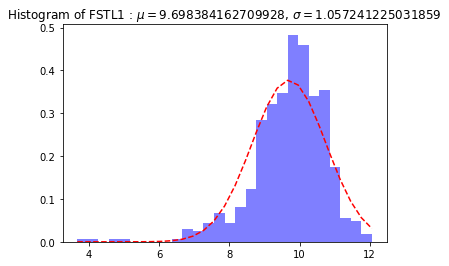

In [195]:
hist_col("FSTL1",mRNAArray,mRNA_description)

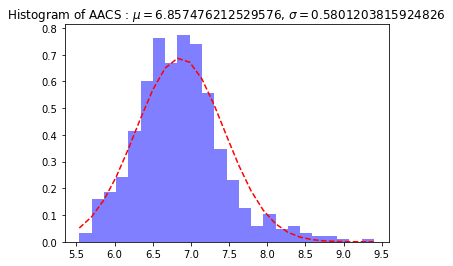

In [196]:
hist_col("AACS",mRNAArray,mRNA_description)

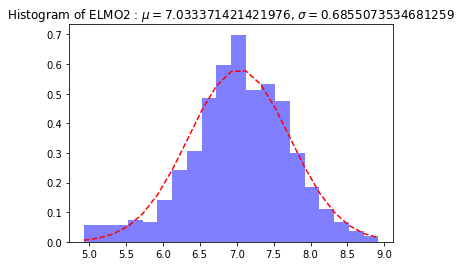

In [197]:
hist_col("ELMO2",mRNAArray,mRNA_description)

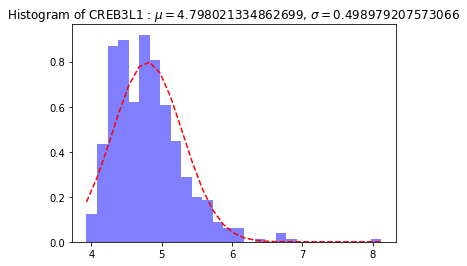

In [198]:
hist_col("CREB3L1",mRNAArray,mRNA_description)

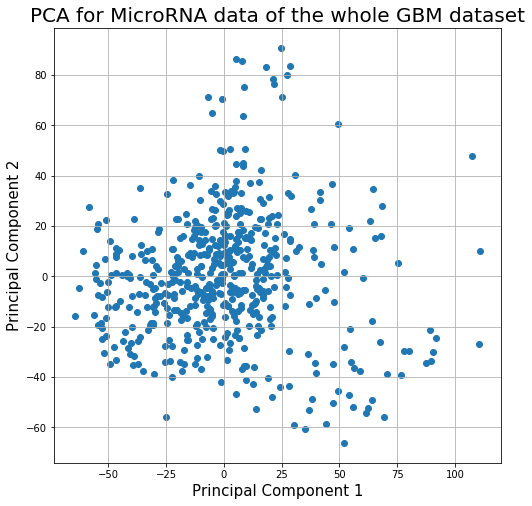

## Comparison with Verhaak Gene Signature and Verhaak Sample

In [316]:
Sample_status=pd.read_csv('Sample_status.txt', sep="\t",header=0,index_col=0)
Sample_status.tail(10)

,Subtype,IDH1mut
CLID,,
TCGA-08-0375,CL,wt
TCGA-08-0380,NL,wt
TCGA-08-0385,PN,wt
TCGA-08-0386,NL,wt
TCGA-08-0390,MES,wt
TCGA-08-0392,MES,wt
TCGA-12-0616,PN,wt
TCGA-12-0618,PN,wt
TCGA-12-0619,MES,wt


In [224]:
Veerhak_GS=pd.read_csv('Verhaak_gene_signature.csv', sep=";",header=0,index_col=0)
Veerhak_GS=pd.DataFrame(Veerhak_GS.index.tolist())
Veerhak_GS.columns=["Gene Symbol"]
Veerhak_GS.head()

,Gene Symbol
0,CDKN1B
1,EPB41
2,CLGN
3,PDE10A
4,RALGPS2


In [321]:
mRNAArray_genes=pd.DataFrame(mRNAArray.columns.tolist())
mRNAArray_genes.columns=["Gene Symbol"]
Veerhak_GS_match=pd.merge(mRNAArray_genes,Veerhak_GS,how="left",on="Gene Symbol",indicator=True)

In [322]:
sum(Veerhak_GS_match["_merge"]=="both")

840

In [ ]:
#Note: All Genes in the Verhaak signature are in the mRNA dataset

In [323]:
def check(df1: pd.DataFrame, df2: pd.DataFrame):
    """
    Function to check if the ids in one dataframe are also on the other dataframe  Arguments:
    df1= Larger dataframe
    df2= Smaller dataframe
    """
    
    d=dict()
    for x in df1.index.tolist():
        d[x]=list() 
    for i in df1.index.tolist():
        for j in df2.index.tolist():
            if i in j:
                d[i]=j
    return d

In [324]:
d=check(Sample_status,mRNAArray)
d

{'TCGA-02-0003': 'TCGA-02-0003-01A-01R-0177-01',
 'TCGA-02-0004': 'TCGA-02-0004-01A-01R-0298-01',
 'TCGA-02-0006': [],
 'TCGA-02-0007': 'TCGA-02-0007-01A-01R-0177-01',
 'TCGA-02-0009': 'TCGA-02-0009-01A-01R-0177-01',
 'TCGA-02-0010': 'TCGA-02-0010-01A-01R-0177-01',
 'TCGA-02-0011': 'TCGA-02-0011-01B-01R-0177-01',
 'TCGA-02-0014': 'TCGA-02-0014-01A-01R-0177-01',
 'TCGA-02-0016': 'TCGA-02-0016-01A-01R-0298-01',
 'TCGA-02-0021': 'TCGA-02-0021-01A-01R-0177-01',
 'TCGA-02-0023': 'TCGA-02-0023-01B-01R-0298-01',
 'TCGA-02-0024': 'TCGA-02-0024-01B-01R-0177-01',
 'TCGA-02-0025': 'TCGA-02-0025-01A-01R-0298-01',
 'TCGA-02-0026': 'TCGA-02-0026-01B-01R-0298-01',
 'TCGA-02-0027': 'TCGA-02-0027-01A-01R-0177-01',
 'TCGA-02-0028': 'TCGA-02-0028-01A-01R-0177-01',
 'TCGA-02-0033': 'TCGA-02-0033-01A-01R-0177-01',
 'TCGA-02-0034': 'TCGA-02-0034-01A-01R-0177-01',
 'TCGA-02-0038': 'TCGA-02-0038-01A-01R-0177-01',
 'TCGA-02-0039': 'TCGA-02-0039-01A-01R-0298-01',
 'TCGA-02-0043': 'TCGA-02-0043-01A-01R-0177-01',

In [290]:
#Just 2 of the Verhaak samples aren't in the FireBrowse Database of GBM data

In [341]:
Verhaak_id=list()
Firebrowse_id=list()
for each in d.keys():
    if len(d[each])>0:
        Verhaak_id.append(each)
        Firebrowse_id.append(d[each])
    else:
        Verhaak_id.append(each)
        Firebrowse_id.append(None)
dummie=pd.DataFrame()
dummie["CLID"]=Verhaak_id
dummie["Hybridization REF"]=Firebrowse_id
dummie.head()

,CLID,Hybridization REF
0,TCGA-02-0003,TCGA-02-0003-01A-01R-0177-01
1,TCGA-02-0004,TCGA-02-0004-01A-01R-0298-01
2,TCGA-02-0006,None
3,TCGA-02-0007,TCGA-02-0007-01A-01R-0177-01
4,TCGA-02-0009,TCGA-02-0009-01A-01R-0177-01


In [326]:
labels=dummie.merge(Sample_status, how="left", left_on="CLID",right_index=True)
labels.head()

,CLID,Hybridization REF,Subtype,IDH1mut
0,TCGA-02-0003,TCGA-02-0003-01A-01R-0177-01,PN,wt
1,TCGA-02-0004,TCGA-02-0004-01A-01R-0298-01,MES,wt
2,TCGA-02-0006,None,MES,wt
3,TCGA-02-0007,TCGA-02-0007-01A-01R-0177-01,PN,wt
4,TCGA-02-0009,TCGA-02-0009-01A-01R-0177-01,CL,wt


In [367]:
#Code to mark the samples in mRNAArray as one of the four subclasses of GBM or as other, and assign a color to them
result=list()
for i in mRNAArray.index.tolist():
    if i in labels["Hybridization REF"].tolist():
        index=labels["Hybridization REF"].tolist().index(i)
        result.append(labels.loc[index,"Subtype"])
    else:
        result.append("Other")
result=pd.DataFrame(result,columns=["target"])
result.head()

,target
0,Other
1,PN
2,MES
3,PN
4,CL


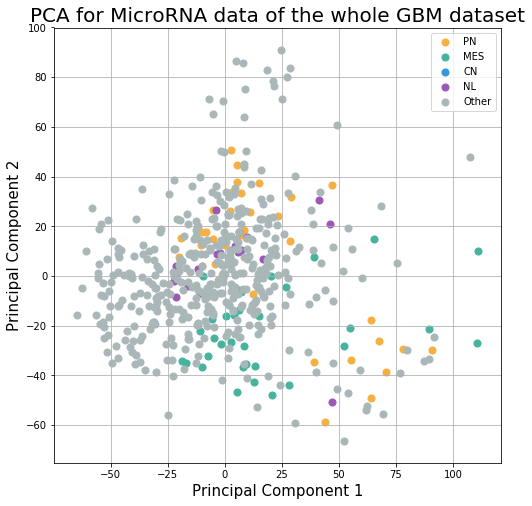

In [375]:
pca = decomposition.PCA(n_components=2)
PC = pca.fit_transform(mRNAArray.values)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets=["PN","MES","CN","NL","Other"]
colors = ["#F5B041", '#45B39D', '#3498DB',"#9B59B6","#AAB7B8"]
ax.set_title('PCA for MicroRNA data of the whole GBM dataset', fontsize = 20)
for target,color in zip(targets,colors):
    indicesToKeep = result['target'] == target
    ax.scatter(PC[indicesToKeep,0]
               , PC[indicesToKeep,1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()   


## miRNA

In [203]:
miRNA= pd.read_csv('20160128-GBM-miRNAArray-1.txt', sep="\t",header=0,index_col=0)
miRNA=miRNA.drop("Composite Element REF")
miRNA=miRNA.apply(pd.to_numeric)
miRNA=miRNA.transpose()
miRNA.head()

Hybridization REF,ebv-miR-BART1-3p,ebv-miR-BART1-5p,ebv-miR-BART10,ebv-miR-BART11-3p,ebv-miR-BART11-5p,ebv-miR-BART12,ebv-miR-BART13,ebv-miR-BART14-3p,ebv-miR-BART14-5p,ebv-miR-BART15,...,kshv-miR-K12-3*,kshv-miR-K12-4-3p,kshv-miR-K12-4-5p,kshv-miR-K12-5,kshv-miR-K12-6-3p,kshv-miR-K12-6-5p,kshv-miR-K12-7,kshv-miR-K12-8,kshv-miR-K12-9,kshv-miR-K12-9*
TCGA-02-0001-01C-01T-0179-07,5.855126,5.799428,5.862059,5.608860,5.812956,5.932238,7.417908,5.769454,5.789184,5.946758,...,5.719811,5.745194,5.811312,5.736368,5.728056,5.770694,5.954499,5.892369,5.740376,5.537198
TCGA-02-0003-01A-01T-0179-07,5.801614,5.790478,5.818763,5.613089,5.768700,5.870240,7.314205,5.747051,5.795356,5.853679,...,5.723980,5.765822,5.800511,5.721188,6.379601,6.111412,5.913446,5.956731,5.678515,5.419889
TCGA-02-0004-01A-01T-0301-07,5.771332,5.758764,5.825401,6.093861,5.735270,5.770635,7.823204,5.803734,5.836945,5.795328,...,5.704891,5.749982,5.948948,5.750624,5.694624,5.765020,5.865792,5.969540,5.707225,5.776249
TCGA-02-0006-01B-01T-0179-07,5.763649,5.800184,5.831836,5.670716,5.744179,5.843112,7.960615,5.787032,5.729842,5.774198,...,5.714445,5.833380,5.819785,5.728482,5.707965,5.705503,6.237077,5.984284,5.685517,5.404694
TCGA-02-0007-01A-01T-0179-07,5.818828,5.800582,5.818181,5.585730,5.785541,5.897554,7.347849,5.804559,5.803284,5.802757,...,5.737695,5.723913,5.850117,5.724573,5.763876,5.717107,5.935077,6.060616,5.669469,5.549034


In [204]:
miRNA_description=miRNA.describe()
miRNA_description.head(10)

Hybridization REF,ebv-miR-BART1-3p,ebv-miR-BART1-5p,ebv-miR-BART10,ebv-miR-BART11-3p,ebv-miR-BART11-5p,ebv-miR-BART12,ebv-miR-BART13,ebv-miR-BART14-3p,ebv-miR-BART14-5p,ebv-miR-BART15,...,kshv-miR-K12-3*,kshv-miR-K12-4-3p,kshv-miR-K12-4-5p,kshv-miR-K12-5,kshv-miR-K12-6-3p,kshv-miR-K12-6-5p,kshv-miR-K12-7,kshv-miR-K12-8,kshv-miR-K12-9,kshv-miR-K12-9*
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,...,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,5.762465,5.761290,5.827867,6.038341,5.733505,5.828326,8.125960,5.791325,5.786512,5.760055,...,5.701407,5.799164,5.856791,5.747247,5.759434,5.730977,6.058786,6.145021,5.676959,5.828618
std,0.071619,0.050603,0.102571,0.170743,0.040894,0.145121,0.566490,0.070697,0.059703,0.052686,...,0.049544,0.074304,0.075894,0.049415,0.057860,0.052235,0.281920,0.168239,0.039661,0.118646
min,5.640711,5.638967,5.665167,5.585730,5.596362,5.636164,6.564627,5.657237,5.645494,5.631432,...,5.561236,5.638510,5.721212,5.620786,5.623663,5.613748,5.609046,5.773135,5.558952,5.369246
25%,5.728460,5.730649,5.786454,5.936376,5.711788,5.772264,7.769877,5.760570,5.753791,5.730829,...,5.679559,5.755752,5.811947,5.719072,5.734385,5.707161,5.891580,6.036652,5.657015,5.780703
50%,5.753007,5.756657,5.816561,6.010434,5.733328,5.801670,8.030034,5.786092,5.779479,5.752950,...,5.699001,5.787510,5.845097,5.744699,5.755687,5.726972,5.967175,6.112435,5.677774,5.818520
75%,5.779779,5.784664,5.848008,6.098132,5.748970,5.842607,8.410495,5.813126,5.809122,5.780404,...,5.717289,5.820616,5.877118,5.768077,5.778647,5.747012,6.119218,6.227006,5.695390,5.852338
max,6.721811,6.129707,7.430427,7.108498,6.135909,7.956467,10.374996,6.921549,6.230364,6.187438,...,6.197287,6.319326,6.380954,6.120049,6.379601,6.301833,7.764772,7.076102,5.984710,6.556750


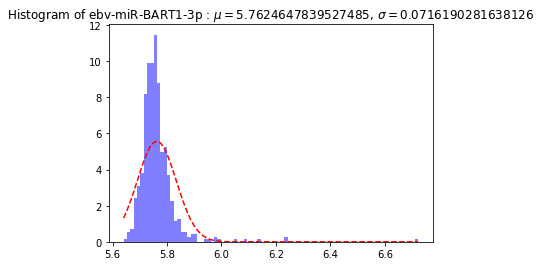

In [205]:
hist_col("ebv-miR-BART1-3p",miRNA,miRNA_description)

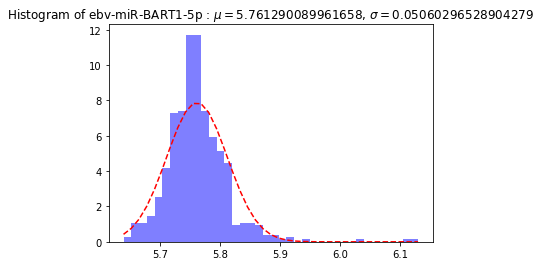

In [206]:
hist_col("ebv-miR-BART1-5p",miRNA,miRNA_description)

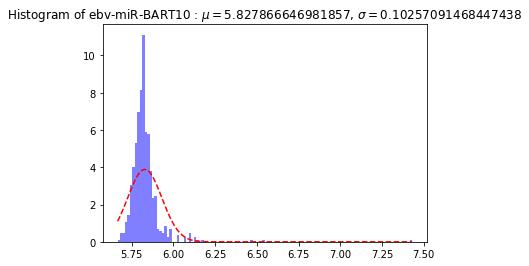

In [207]:
hist_col("ebv-miR-BART10",miRNA,miRNA_description)

## Methylation

In [211]:
Methylation= pd.read_csv('20160128-GBM-Methylation-1.txt', sep="\t",header=0,index_col=0)
Methylation=Methylation.drop("Composite Element REF")
Methylation=Methylation.transpose()
Methylation.head()

Hybridization REF,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,cg00010193,...,cg27653134,cg27654142,cg27655855,cg27655905,cg27657249,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659
TCGA-02-0001-01C-01D-0186-05,0.826063400580864,0.178659348468661,0.0414512366035448,0.381918845748048,NaN,0.0378226814500916,0.981055336789946,0.0185800932177329,0.0378532148581555,0.597356712452145,...,0.893999,0.0279916,NaN,0.0492664,0.135939,0.046638,0.363642,0.0277178,0.0441347,0.0212296
TCGA-02-0001-01C-01D-0186-05.1,ATP2A1,SLMAP,MEOX2,HOXD3,ZNF425;ZNF398,PANX1,COX8C;KIAA1409,IMPA2,TTC8,NaN,...,A2ML1,ZFP2,CST9L,C11orf24,NaN,LEPRE1;C1orf50,GNAS,RPN1,CYB5A,AP1S1
TCGA-02-0001-01C-01D-0186-05.2,16,3,7,2,7,11,14,18,14,NaN,...,12,5,20,11,NaN,1,20,3,18,7
TCGA-02-0001-01C-01D-0186-05.3,28890100,57743543,15725862,177029073,148822837,93862594,93813777,11980953,89290921,0,...,8975309,178322924,23549455,68038788,0,43233523,57427738,128369753,71959595,100797595
TCGA-02-0003-01A-01D-0186-05,0.69660990441374,0.555947718002542,0.103889979051244,0.851629894300493,NaN,0.0506477097831607,0.989162923386702,0.127842916524696,0.0614877612251458,0.627175775037815,...,0.887894,0.0144755,NaN,0.0423512,NaN,0.0925172,0.369997,0.0175283,0.0406684,0.030686


## CopyNumber

In [ ]:
#I am not sure if this is the right copy number data 

In [37]:
CopyNumber= pd.read_csv('20160128-GBM-CNASNPHg19.txt', sep="\t",header=0,index_col=0)
CopyNumber.head()

,Chromosome,Start,End,Num_Probes,Segment_Mean
Sample,,,,,
TCGA-02-0001-10A-01D-0182-01,1,61735,15489625,7990,0.0371
TCGA-02-0001-10A-01D-0182-01,1,15489638,15490286,10,0.6953
TCGA-02-0001-10A-01D-0182-01,1,15493910,17093417,818,0.0410
TCGA-02-0001-10A-01D-0182-01,1,17094015,17248398,51,-0.3498
TCGA-02-0001-10A-01D-0182-01,1,17253375,22296307,3367,0.0272


## RNASeq Data

In [246]:
RNASeq=pd.read_csv('GBM.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt', sep="\t",header=0,index_col=0)
RNASeq=RNASeq.drop("gene_id")
RNASeq=RNASeq.apply(pd.to_numeric)
RNASeq=RNASeq.transpose()
RNASeq.head()

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
TCGA-02-0047-01A-01R-1849-01,0.0,3.0732,6.7611,54.7036,886.3210,0.0,232.9512,0.0000,0.0,0.0,...,65.1526,356.4953,1108.8233,0.6146,1207.1668,3867.9738,1397.0927,603.5834,6.7611,0.0
TCGA-02-0055-01A-01R-1849-01,0.0,0.0000,15.6973,31.3945,885.7744,0.0,162.0182,0.5606,0.0,0.0,...,42.6069,280.3083,607.7085,5.0456,924.4569,11481.4296,606.0266,718.1500,12.3336,0.0
TCGA-02-2483-01A-01R-1849-01,0.0,2.9467,13.9398,60.3441,1234.8285,0.0,135.0923,0.0000,0.0,0.0,...,19.4195,406.1214,866.2797,44.3272,1208.6544,5066.8074,832.0844,705.4354,398.9446,0.0
TCGA-02-2485-01A-01R-1849-01,0.0,15.9952,14.9571,91.8238,470.0000,0.0,417.6190,1.9048,0.0,0.0,...,53.8095,274.2857,1345.7143,0.0000,1070.0000,5090.9524,1139.5238,700.4762,15.7143,0.0
TCGA-02-2486-01A-01R-1849-01,0.0,5.5610,4.8049,62.5366,546.3415,0.0,276.2195,0.0000,0.0,0.0,...,31.7073,198.1707,652.4390,0.0000,689.6341,7800.0000,627.4390,527.4390,69.5122,0.0


In [249]:
RNASeq_description=RNASeq.describe()
RNASeq_description.head(9)

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.0,171.000000,171.000000,171.0,171.0,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.034032,6.636998,9.940446,60.105196,653.272607,0.0,425.840155,0.740589,0.0,0.0,...,55.685537,372.700150,1028.670229,2.914652,1162.056123,7396.001312,1085.065123,680.302417,77.312954,0.025412
std,0.159486,5.428784,5.611120,19.986512,226.435829,0.0,313.874665,0.887412,0.0,0.0,...,22.426281,127.368987,285.551154,7.409476,381.244404,4140.673690,440.035783,169.426223,358.202071,0.200100
min,0.000000,0.000000,0.000000,27.088000,331.168100,0.0,33.483600,0.000000,0.0,0.0,...,4.994800,167.095100,443.066500,0.000000,506.812000,1239.196000,278.110200,283.216900,0.000000,0.000000
25%,0.000000,2.641250,5.868000,46.769300,506.025450,0.0,208.775050,0.000000,0.0,0.0,...,41.743850,284.719800,843.070550,0.441400,942.132350,4341.082300,811.804400,565.331600,7.887550,0.000000
50%,0.000000,5.491800,9.786600,56.298000,614.026500,0.0,342.897100,0.513300,0.0,0.0,...,53.809500,354.293400,1038.876000,1.061100,1116.333700,6367.216100,1047.295000,664.759400,13.882700,0.000000
75%,0.000000,9.674400,13.208150,70.633550,760.262300,0.0,560.077900,1.106850,0.0,0.0,...,67.162600,432.348400,1208.172500,2.553250,1260.743950,9797.034550,1343.134150,782.039250,27.307600,0.000000
max,1.175100,27.989300,28.799300,135.060300,2140.303700,0.0,2078.431400,5.012500,0.0,0.0,...,157.726600,1027.236400,2272.025800,68.503400,3468.534200,22510.284800,3456.869700,1364.511700,4007.687900,2.359900


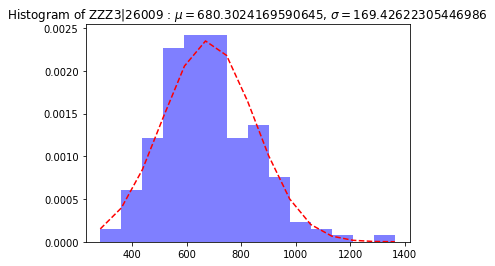

In [250]:
hist_col("ZZZ3|26009",RNASeq,RNASeq_description)

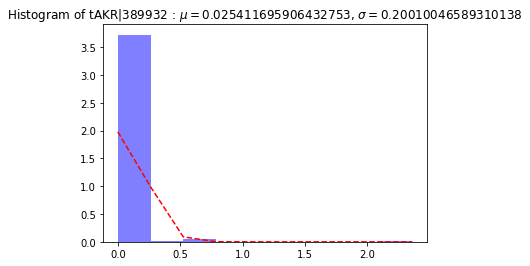

In [251]:
hist_col("tAKR|389932",RNASeq,RNASeq_description)